<a href="https://colab.research.google.com/github/Divine193/access6.0projects/blob/master/WEEK5/Linear_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# LOAD THE CLEANED DATASET
cleaned_data = pd.read_csv('/content/drive/MyDrive/Cleaned_Sales_Data.csv')

In [4]:
# PRINT OUT THE FIRST FIVE ROWS
cleaned_data.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,DATE,TOTAL SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0,2020-01-01,2.00
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0,2020-01-01,4.00
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0,2020-01-01,1.00
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0,2020-01-01,1.00
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0,2020-01-01,0.82


In [5]:
# PRINT OUT THE TOTAL ROWS AND COLUMNS OF THE DATASET
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307645 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307645 non-null  object 
 6   RETAIL SALES      307645 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
 9   DATE              307645 non-null  object 
 10  TOTAL SALES       307645 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 25.8+ MB


In [6]:
# summary statistics
cleaned_data.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,307645.0,2018.438525,1.083061,2017.00,2017.0,2019.00,2019.00,2020.00
MONTH,307645.0,6.423862,3.461812,1.00,3.0,7.00,9.00,12.00
RETAIL SALES,307645.0,7.024003,30.986095,-6.49,0.0,0.32,3.26,2739.00
RETAIL TRANSFERS,307645.0,6.936465,30.237195,-38.49,0.0,0.00,3.00,1990.83
WAREHOUSE SALES,307645.0,25.294597,249.916798,-7800.00,0.0,1.00,5.00,18317.00
TOTAL SALES,307645.0,32.318600,266.486255,-7800.00,1.0,2.68,10.50,19491.00


In [7]:
# CHECK FOR ANY MISSING VALUES
cleaned_data.isna().sum()

,0
YEAR,0
MONTH,0
SUPPLIER,0
ITEM CODE,0
ITEM DESCRIPTION,0
ITEM TYPE,0
RETAIL SALES,0
RETAIL TRANSFERS,0
WAREHOUSE SALES,0
DATE,0


## Prepare Features

Convert the 'DATE' column to datetime objects. Engineer new time-based features such as 'DAY_OF_WEEK' and 'QUARTER'. Select relevant numerical features like 'WAREHOUSE SALES' and 'RETAIL TRANSFERS', and categorical features such as 'SUPPLIER', 'ITEM TYPE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', and 'QUARTER'.


First, convert the 'DATE' column to datetime objects to enable extraction of time-based features. This is a prerequisite for the subsequent steps.



In [12]:
cleaned_data['DATE'] = pd.to_datetime(cleaned_data['DATE'])
print("Converted 'DATE' column to datetime objects.")

Converted 'DATE' column to datetime objects.


Extract 'DAY_OF_WEEK' and 'QUARTER' from the 'DATE' column, and then define the lists of numerical and categorical features as specified in the instructions.



In [13]:
cleaned_data['DAY_OF_WEEK'] = cleaned_data['DATE'].dt.dayofweek
cleaned_data['QUARTER'] = cleaned_data['DATE'].dt.quarter

numerical_features = ['WAREHOUSE SALES', 'RETAIL TRANSFERS']
categorical_features = ['SUPPLIER', 'ITEM TYPE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'QUARTER']

print("Engineered 'DAY_OF_WEEK' and 'QUARTER' features.")
print("Defined numerical and categorical feature lists.")

Engineered 'DAY_OF_WEEK' and 'QUARTER' features.
Defined numerical and categorical feature lists.


<Axes: >

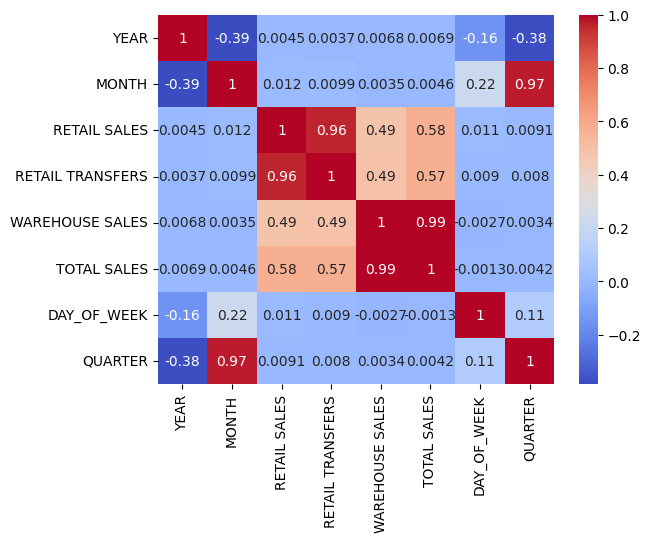

In [36]:
numerical_cols = ['YEAR', 'MONTH', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES', 'TOTAL SALES', 'DAY_OF_WEEK', 'QUARTER']
cleaned_data_corr = cleaned_data[numerical_cols].corr()
sns.heatmap(cleaned_data_corr, annot=True, cmap='coolwarm')

## Encode Categorical Features
Apply one-hot encoding to the selected categorical features to convert them into a numerical format suitable for linear regression. This will create new columns for each category.


First, import `OneHotEncoder` from `sklearn.preprocessing` to prepare for one-hot encoding categorical features.



In [14]:
from sklearn.preprocessing import OneHotEncoder
print("Imported OneHotEncoder.")

Imported OneHotEncoder.


Instantiate the OneHotEncoder, fit and transform the categorical features, and then create a DataFrame with the encoded features and their names.



In [15]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features_array = encoder.fit_transform(cleaned_data[categorical_features])
encoded_features = pd.DataFrame(encoded_features_array)

feature_names = encoder.get_feature_names_out(categorical_features)
encoded_features.columns = feature_names

print("Categorical features have been one-hot encoded and stored in 'encoded_features' DataFrame.")

Categorical features have been one-hot encoded and stored in 'encoded_features' DataFrame.


## Scale Numerical Features

Apply StandardScaler to numerical features to normalize their scale. This helps ensure that features with larger values do not disproportionately influence the model.


First, import `StandardScaler` from `sklearn.preprocessing` to prepare for scaling numerical features.



In [16]:
from sklearn.preprocessing import StandardScaler
print("Imported StandardScaler.")

Imported StandardScaler.


Instantiate the `StandardScaler`, fit it to the numerical features from the `cleaned_data` DataFrame, and then transform these features. Store the scaled features in a new DataFrame called `scaled_numerical_features`.



In [17]:
scaler = StandardScaler()
scaled_numerical_features_array = scaler.fit_transform(cleaned_data[numerical_features])
scaled_numerical_features = pd.DataFrame(scaled_numerical_features_array, columns=numerical_features)

print("Numerical features have been scaled and stored in 'scaled_numerical_features' DataFrame.")

Numerical features have been scaled and stored in 'scaled_numerical_features' DataFrame.


## Combine Features and Split Data

Combine all processed features (encoded categorical and scaled numerical) into a single feature set. Then, split the data into training and testing sets (e.g., 80% for training, 20% for testing), with 'RETAIL SALES' as the target variable.


Concatenate the scaled numerical features and the one-hot encoded categorical features into a single DataFrame `X`. It's important to reset the index of `encoded_features` to ensure proper alignment during concatenation, as `scaled_numerical_features` is already indexed from 0.



In [18]:
encoded_features.reset_index(drop=True, inplace=True)
X = pd.concat([scaled_numerical_features, encoded_features], axis=1)

print("Combined all processed features into a single feature set 'X'.")

Combined all processed features into a single feature set 'X'.


Define the target variable `y` as 'RETAIL SALES' from the original `cleaned_data` DataFrame and then split the combined feature set `X` and the target variable `y` into training and testing sets.



In [19]:
y = cleaned_data['RETAIL SALES']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Target variable 'y' defined as 'RETAIL SALES'.")
print("Data split into training and testing sets.")

Target variable 'y' defined as 'RETAIL SALES'.
Data split into training and testing sets.


## Train Linear Regression Model

Initialize and train a Linear Regression model using the prepared training data. The model will learn the relationship between the features and 'RETAIL SALES'.


First, import `LinearRegression` from `sklearn.linear_model` to prepare for training the model.



In [20]:
from sklearn.linear_model import LinearRegression
print("Imported LinearRegression.")

Imported LinearRegression.


Instantiate a `LinearRegression` model and then fit it to the training data, using `X_train` as features and `y_train` as the target variable.



In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Linear Regression model has been trained.")

Linear Regression model has been trained.


## Evaluate Model Performance

Make predictions on the test set and evaluate the model's performance using metrics such as Mean Squared Error (MSE) and R-squared (R2) to understand how well the model predicts 'RETAIL SALES'.


Make predictions on the test set (`X_test`) using the trained `model` to get `y_pred`.



In [22]:
y_pred = model.predict(X_test)
print("Predictions made on the test set.")

Predictions made on the test set.


Import `mean_squared_error` and `r2_score` from `sklearn.metrics`, then calculate and print both the Mean Squared Error (MSE) and R-squared (R2) score.



In [44]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 41.99911294391142
Root Mean Squared Error (RMSE): 6.480672260183462
R-squared (R2): 0.9600956349711397


## Create Actual vs. Predicted DataFrame

Create a Pandas DataFrame that takes 'y_test' and 'y_pred' as columns, allowing for a side-by-side comparison of the actual and predicted 'RETAIL SALES' values.


Reset the index of `y_test` to ensure proper alignment when creating the DataFrame, then create a dictionary with 'Actual' and 'Predicted' keys, mapping them to the reset `y_test` Series and `y_pred` array, respectively. Finally, convert this dictionary into a Pandas DataFrame named `results_df`.



In [28]:
y_test_reset = y_test.reset_index(drop=True)
results_df = pd.DataFrame({
    'Actual': y_test_reset,
    'Predicted': y_pred
})
print("Created 'results_df' DataFrame with actual and predicted values.")

results_df.head(20)

Created 'results_df' DataFrame with actual and predicted values.


,Actual,Predicted
0,0.00,-0.442105
1,5.91,6.893762
2,23.99,25.005077
3,7.27,9.019906
4,0.29,-0.186265
5,0.00,-0.451341
6,0.00,0.168213
7,0.00,0.270483
8,0.17,0.746969
9,0.68,1.392143


## Visualize Predictions

Generate a scatter plot comparing the actual 'RETAIL SALES' values from the test set against the model's predicted 'RETAIL SALES' values. Include appropriate labels and a legend.


In [29]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 41.99911294391142
R-squared (R2): 0.9600956349711397


Generate a scatter plot using `matplotlib.pyplot` to visualize the actual versus predicted values of 'RETAIL SALES'. This plot will include appropriate labels, a title, a legend, and a diagonal line to represent perfect predictions for visual comparison.



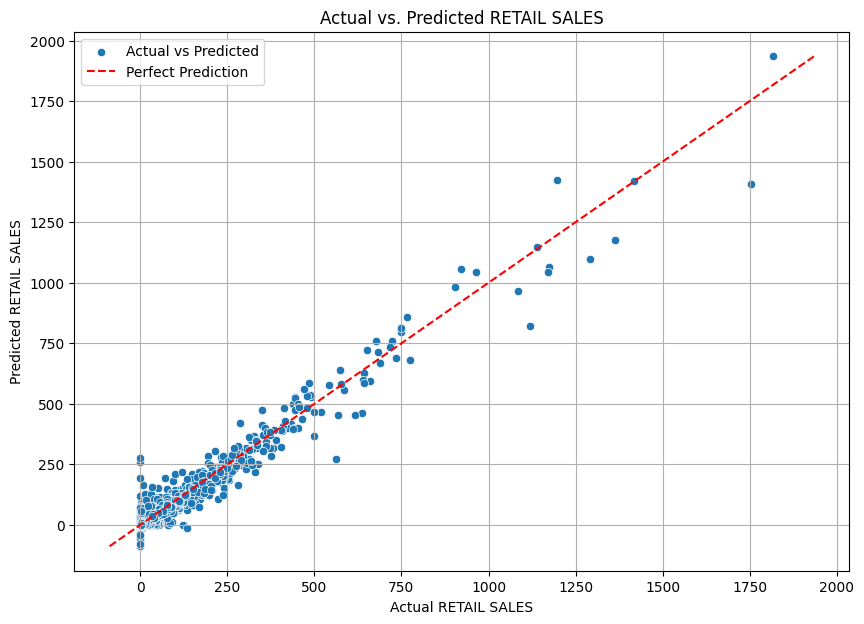

Scatter plot of Actual vs. Predicted RETAIL SALES generated.


In [25]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Actual', y='Predicted', data=results_df, label='Actual vs Predicted')

# Add the perfect prediction line (x=y)
min_val = min(results_df['Actual'].min(), results_df['Predicted'].min())
max_val = max(results_df['Actual'].max(), results_df['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual RETAIL SALES')
plt.ylabel('Predicted RETAIL SALES')
plt.title('Actual vs. Predicted RETAIL SALES')
plt.legend()
plt.grid(True)
plt.show()

print("Scatter plot of Actual vs. Predicted RETAIL SALES generated.")

**Mean Squared Error (MSE)**: 41.9991
**R-squared (R2)**: 0.9601
Here's what these numbers tell us:

**R-squared (R2) of 0.9601**: An R-squared value represents the proportion of the variance in the dependent variable (in this case, 'RETAIL SALES') that can be predicted from the independent variables (all the features you included). An R2 of approximately 96% means that about 96% of the variability in 'RETAIL SALES' can be explained by the features you've used in your model. This indicates that your model is doing an excellent job of capturing the underlying patterns that drive retail sales.

**Mean Squared Error (MSE) of 41.9991:** MSE measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. A value of approximately 42 tells you the typical squared magnitude of the errors. While the absolute number can be hard to interpret on its own, when combined with the high R2, it suggests that the model's predictions are, on average, quite close to the actual retail sales figures. A lower MSE is always better, and in the context of a 96% R2, this MSE is considered good.

In summary, your model is performing very well in predicting 'RETAIL SALES' based on the features you selected and engineered. The scatter plot you generated earlier, showing a tight cluster of points around the 'perfect prediction' line, also visually supports this strong performance.